EJERCICIO 5:
Para los datos de 'Coactivation_matrix.mat', filtre la matriz para que, para cada nodo, se mantenga aquel nodo con mayor comunicación, con el nuevo arreglo muestre los nodos y vértices del grafo.

In [28]:
import scipy.io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

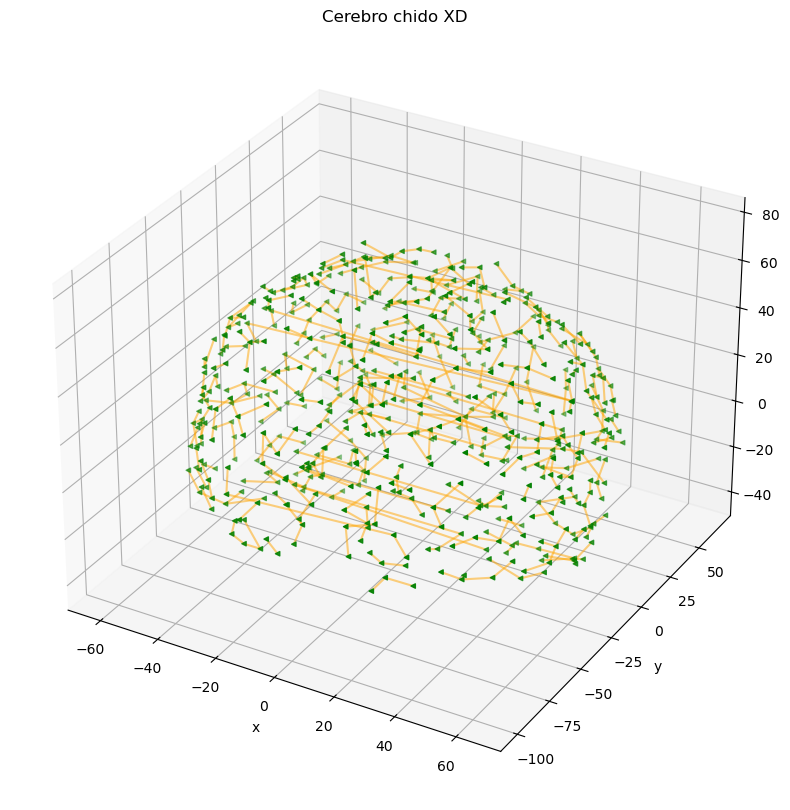

In [34]:
archivo = scipy.io.loadmat(r"C:\Users\oswal\OneDrive\Documentos\REPO PROFE\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat")

dict = {k: v for k, v in archivo.items() if k[0] != '_'}
matriz = dict['Coactivation_matrix']
coord = dict['Coord']

n_nodes = matriz.shape[0]
f_matriz = np.zeros_like(matriz)

for i in range(n_nodes):
    idx= np.argmax(matriz[i, :])
    f_matriz[i, idx] = matriz[i, idx]
G = nx.from_numpy_array(f_matriz)
x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=10, marker= '<', c='green')
for edge in G.edges():
    node1, node2 = edge
    x_coords = [x[node1], x[node2]]
    y_coords = [y[node1], y[node2]]
    z_coords = [z[node1], z[node2]]
    ax.plot(x_coords, y_coords, z_coords, c='orange', alpha=0.5)

ax.set_title("Cerebro chido XD")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()